# Sales Prediction from Exicuting Customer

# Importing Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\DigitalAd_dataset.csv")

# Summarize Dataset

In [3]:
df.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


In [4]:
df.shape

(400, 3)

#### Lets check null values

In [5]:
df.isnull().any()

Age       False
Salary    False
Status    False
dtype: bool

##### so no columns here which have null values

In [6]:
df.describe()

,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


##### Average sallary of costumer:

In [7]:
print("Average salary of costumer is:",df.Salary.mean())

Average salary of costumer is: 69742.5


##### Average age of person purchasing product

In [8]:
d=df[df['Status']==1]

In [9]:
d.Age.mean()

46.39160839160839

# Segregate Dataset into X(independent variable) and Y(dependent Variable)

In [10]:
x=df.iloc[:,:-1] #independent variable

In [11]:
y=df.iloc[:,-1]   #dependent variable

# Splitting dataset into train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train

,Age,Salary
336,38,113000
64,28,87000
55,31,68000
106,36,75000
300,39,79000
...,...,...
323,35,79000
192,55,130000
117,33,31000
47,25,87000


# Features Scalling

### we scale our data to make all the features contribute equally to the result

### Fit_transform:fit method calculated the mean and variance of each of the features present in the data

### Transform: this method is transform all the the features using respective mean and varience

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Training Model

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
LR_model=LogisticRegression()

In [18]:
LR_model.fit(x_train,y_train)

LogisticRegression()

# Prediction

## Weather New costomer with Age and Salary will bye or not

In [19]:
age=int(input("Enter the Age:"))
sal=int(input("Enter the Salary:"))
input=[[age,sal]]

result=LR_model.predict(sc.transform(input))
if result==1:
    print("Costomer will Bye Product")
else:
    print("Costomer wont Bye Product ")

Enter the Age:25
Enter the Salary:500000
Costomer will Bye Product


In [23]:
print(result)

[1]


## Prediction for all test Data

In [24]:
predicted=LR_model.predict(x_test)
Actual=y_test

In [29]:
df=pd.DataFrame({"predicted":predicted,"Actual":Actual})
df

,predicted,Actual
132,0,1
309,0,1
341,1,1
196,1,1
246,0,0
...,...,...
14,0,0
363,0,0
304,0,1
361,0,1


# Let Reset Index

## drop

### It tries not to insert the index into the DataFrame columns. It resets the index of the concerned pandas DataFrame to the default integer index. It takes a boolean value i.e. True or False which is by default False.

In [31]:
df.reset_index(drop=True)


,predicted,Actual
0,0,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
75,0,0
76,0,0
77,0,1
78,0,1


In [33]:
df

,predicted,Actual
0,0,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
75,0,0
76,0,0
77,0,1
78,0,1


# Evaluating the Model :Confusion Matrix`

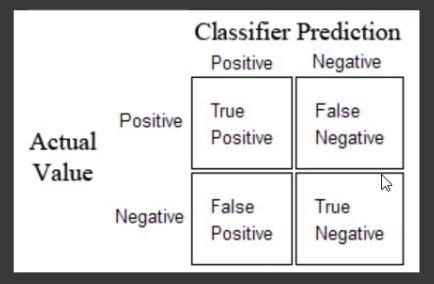

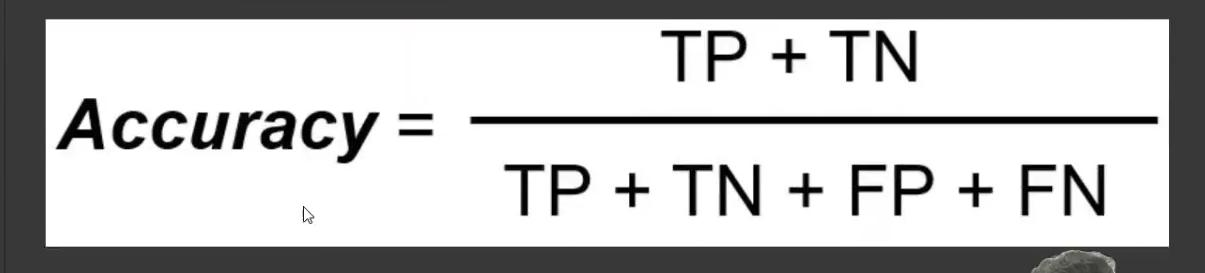

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [45]:
cm=confusion_matrix(Actual,predicted)

In [46]:
print("Confusion Matrix :\n",cm)

Confusion Matrix :
 [[48  1]
 [16 15]]


In [50]:
print("Accuracy Of the Model:\n",accuracy_score(Actual,predicted)*100,"%")

Accuracy Of the Model:
 78.75 %
